In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# Load the dataset
df = pd.read_csv("../data/diabetes_clean.csv")
df.head()

,BMI,HighBP,Age,Smoker,PhysActivity,Diabetes_binary
0,0.325581,1.0,0.666667,1.0,0.0,0.0
1,0.151163,0.0,0.500000,1.0,1.0,0.0
2,0.186047,1.0,0.666667,0.0,0.0,0.0
3,0.174419,1.0,0.833333,0.0,1.0,0.0
4,0.139535,1.0,0.833333,0.0,1.0,0.0


Define Fuzzy Variables
Define “universe of discourse” (ranges)

In [5]:
# Continuous variables
bmi_universe = np.linspace(0, 1, 101)   # 0.00, 0.01, ..., 1.00
age_universe = np.linspace(0, 1, 101)

# Binary-like variables 
binary_universe = np.linspace(0, 1, 101)

# Output risk universe
risk_universe = np.linspace(0, 1, 101)


Create Membership Functions

BMI → Underweight / Healthy / Overweight / Obese
Age → Young / Middle / Old
HighBP → Normal / High
Smoker → Non-Smoker / Smoker
PhysActivity → Inactive / Active
Risk → Very Low / Low / Medium / High / Very High

In [7]:
#BMI Membership Functions
# BMI Fuzzy Sets: Underweight, Healthy, Overweight, Obese
bmi_under = fuzz.trimf(bmi_universe, [0.0, 0.0, 0.25])
bmi_healthy = fuzz.trimf(bmi_universe, [0.15, 0.35, 0.55])
bmi_over = fuzz.trimf(bmi_universe, [0.45, 0.60, 0.75])
bmi_obese = fuzz.trimf(bmi_universe, [0.65, 1.0, 1.0])
#Age Membership Functions
age_young  = fuzz.trimf(age_universe, [0.0, 0.0, 0.4])#18-44
age_middle = fuzz.trimf(age_universe, [0.2, 0.5, 0.8])#30-69
age_old    = fuzz.trimf(age_universe, [0.6, 1.0, 1.0])#50=80+

#HighBP Membership Functions
bp_normal = fuzz.trimf(binary_universe, [0.0, 0.0, 0.4])
bp_high   = fuzz.trimf(binary_universe, [0.6, 1.0, 1.0])
#Smoker Membership Functions
smoke_no  = fuzz.trimf(binary_universe, [0.0, 0.0, 0.4])
smoke_yes = fuzz.trimf(binary_universe, [0.6, 1.0, 1.0])
#PhysActivity Membership Functions
act_inactive = fuzz.trimf(binary_universe, [0.0, 0.0, 0.4])
act_active   = fuzz.trimf(binary_universe, [0.6, 1.0, 1.0])
#Risk Membership Functions
risk_vlow  = fuzz.trimf(risk_universe, [0.0, 0.0, 0.2])
risk_low   = fuzz.trimf(risk_universe, [0.1, 0.25, 0.4])
risk_med   = fuzz.trimf(risk_universe, [0.3, 0.5, 0.7])
risk_high  = fuzz.trimf(risk_universe, [0.6, 0.75, 0.9])
risk_vhigh = fuzz.trimf(risk_universe, [0.8, 1.0, 1.0])


Plot BMI Membership Functions

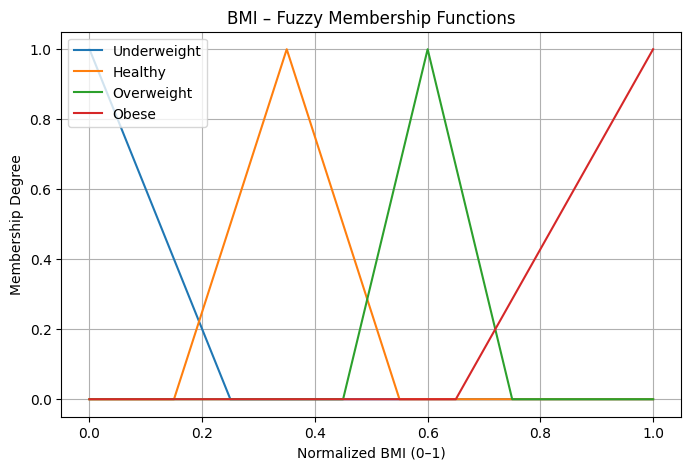

In [8]:
plt.figure(figsize=(8,5))
plt.plot(bmi_universe, bmi_under, label='Underweight')
plt.plot(bmi_universe, bmi_healthy, label='Healthy')
plt.plot(bmi_universe, bmi_over, label='Overweight')
plt.plot(bmi_universe, bmi_obese, label='Obese')

plt.title("BMI – Fuzzy Membership Functions")
plt.xlabel("Normalized BMI (0–1)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


Plot Age Membership Functions

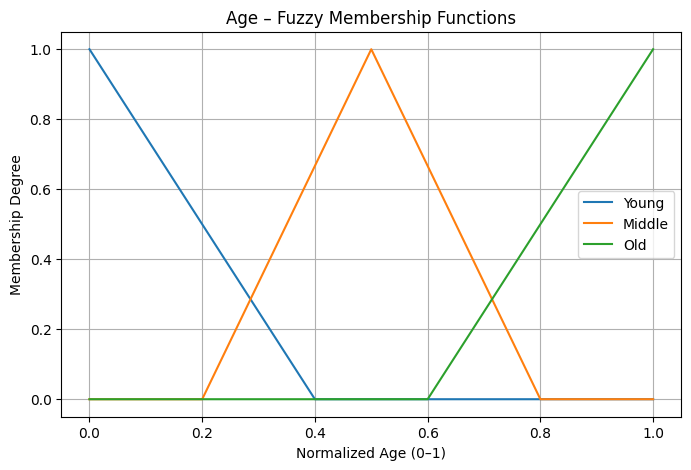

In [9]:
plt.figure(figsize=(8,5))
plt.plot(age_universe, age_young, label='Young')
plt.plot(age_universe, age_middle, label='Middle')
plt.plot(age_universe, age_old, label='Old')

plt.title("Age – Fuzzy Membership Functions")
plt.xlabel("Normalized Age (0–1)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


Plot HighBP Membership Functions

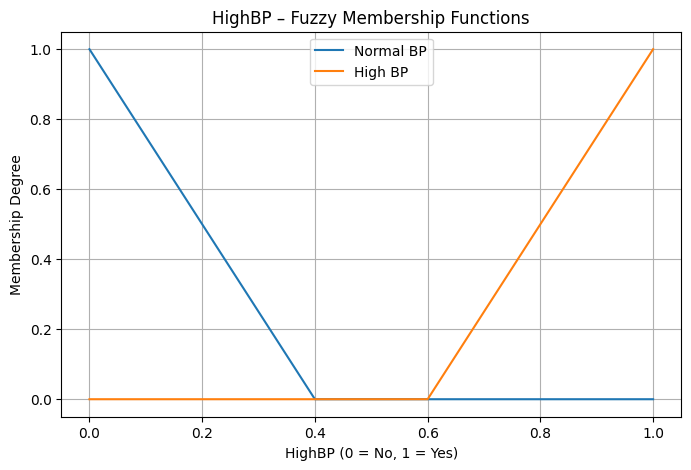

In [10]:
plt.figure(figsize=(8,5))
plt.plot(binary_universe, bp_normal, label='Normal BP')
plt.plot(binary_universe, bp_high, label='High BP')

plt.title("HighBP – Fuzzy Membership Functions")
plt.xlabel("HighBP (0 = No, 1 = Yes)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


Plot Smoker Membership Functions

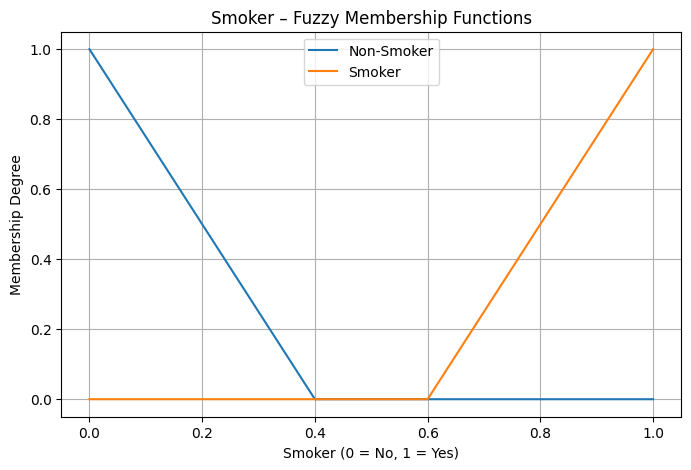

In [11]:
plt.figure(figsize=(8,5))
plt.plot(binary_universe, smoke_no, label='Non-Smoker')
plt.plot(binary_universe, smoke_yes, label='Smoker')

plt.title("Smoker – Fuzzy Membership Functions")
plt.xlabel("Smoker (0 = No, 1 = Yes)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


Plot PhysActivity Membership Functions

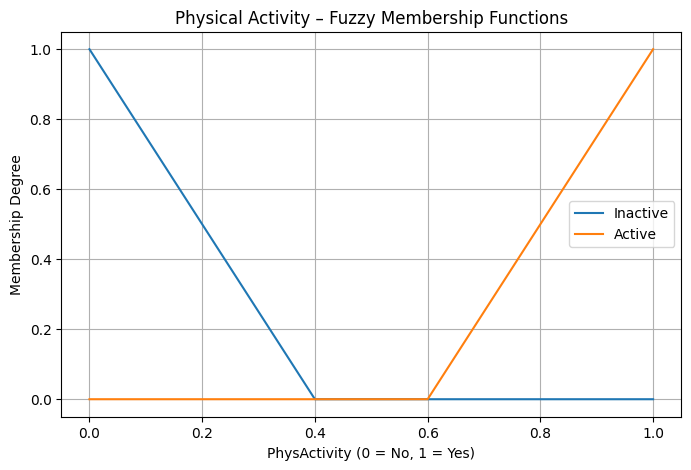

In [12]:
plt.figure(figsize=(8,5))
plt.plot(binary_universe, act_inactive, label='Inactive')
plt.plot(binary_universe, act_active, label='Active')

plt.title("Physical Activity – Fuzzy Membership Functions")
plt.xlabel("PhysActivity (0 = No, 1 = Yes)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()


Plot Risk Output Membership Functions

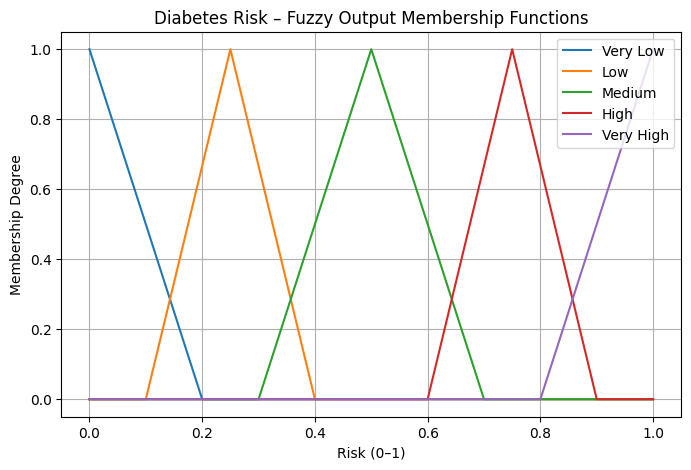

In [13]:
plt.figure(figsize=(8,5))
plt.plot(risk_universe, risk_vlow, label='Very Low')
plt.plot(risk_universe, risk_low, label='Low')
plt.plot(risk_universe, risk_med, label='Medium')
plt.plot(risk_universe, risk_high, label='High')
plt.plot(risk_universe, risk_vhigh, label='Very High')

plt.title("Diabetes Risk – Fuzzy Output Membership Functions")
plt.xlabel("Risk (0–1)")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()
